
## Quantum Anomaly Detection with Quantum Density Estimation

### Density Estimation with Qubits



### Qiskit Hackathon Global 2021

---

**Group: Quantum Mind UN**

Diego Useche - diusecher@unal.edu.co

Oscar Alberto Bustos B. - oabustosb@unal.edu.co

**The problem:**

Anomaly Detection: 
A common need when analyzing datasets is to find which observations deviates considerably from others. Such instances are known as anomalies or outliers, and the goal of anomaly detection (AD) is to detect those atypical or irregular data, generally in unsupervised scenarios. AD has many applications across a wide variety of domains, including intrusion or fraud detection in cybersecurity, industrial monitoring, disease detection for medical diagnosis and rare event detection in science.

Can we build a quantum circuit to perform Anomaly Detection?

**Our Approach**

Anomaly Detection based on Density Estimation:

*   Use normal data to induce a probability density function (pdf) (Density Estimation)
*   Use the pdf to estimate the density of new samples. If the density is below a threshold, then classify it as anomaly.

Quantum Density Estimation:

*   Combine Density Matrices with RFF [Rahimi2007] to perform Density Estimation [González2021]
*   Propose a quantum circuit to estimate expected values of density matrices.

**Main contributions**

*   We developed a new method for Anomaly Detection in quantum computers.
*   We implemented the method in a quantum circuit and showed that it’s a feasible approach.
*   Most quantum machine learning algorithms are based on pure states. Our 
algorithm can work with mixed states and pure states.
*   We develop a new method to calculate the expected value of a density matrix.
*  We used this method to approximate a probability density function (pdf) in a quantum computer.


## Libraries

In [ ]:
!pip install qiskit
!pip install pylatexenc

     |████████████████████████████████| 6.1 MB 5.2 MB/s 
     |████████████████████████████████| 17.9 MB 100 kB/s 
     |████████████████████████████████| 237 kB 43.7 MB/s 
     |████████████████████████████████| 207 kB 64.3 MB/s 
     |████████████████████████████████| 2.1 MB 49.3 MB/s 
     |████████████████████████████████| 1.4 MB 42.6 MB/s 
     |████████████████████████████████| 634 kB 50.5 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 38.2 MB 24 kB/s 
     |████████████████████████████████| 943 kB 9.3 kB/s 
     |████████████████████████████████| 3.5 MB 58.2 MB/s 
     |████████████████████████████████| 6.3 MB 54.7 MB/s 
  Created wheel for qiskit: filename=qiskit-0.32.0-py3-none-any.whl size=11773 sha256=119c097d1b46c8548430527c0e257e8ba18e1675566b342daff7f3c366e5f8d7
  Stored in directory: /root/.cache/pip/wheels/95/84/c4/6a084a33c1909266fca66eed2303c3883e03f33c905b1e

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit import QuantumCircuit, Aer, execute
from qiskit.extensions import Initialize
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import StatevectorSimulator
import tensorflow as tf
import matplotlib.pyplot as plt
from time import time

from scipy.stats import norm
import numpy as np
backend = Aer.get_backend('qasm_simulator')

## Expected Value of Density Matrices with Isometries

In the following section we present a proposed circuit to estimate the expected values of any (nxn) density matrix. For the Qiskit Fall Fest 2021 we proposed a circuit to compute the expected values of (4x4) density matrices. In this proposal we show the method for any (nxn) density matrix, in comparison with the method proposed in the Qiskit Fall Fest 2021, this circuit has less qubits and lower circuit depth.

We take two approaches mixed states, 

$$\rho_{\text{train}} = \frac{1}{N}\sum_{i=0}^{N}|\psi_i><\psi_i>$$

And pure states, 

$$|\psi_{\text{train}}>= \frac{\sum_{i=0}^{N}|\psi_i>}{|\sum_{i=0}^{N}|\psi_i>|}$$

Here we show how to compute, 

$$<\phi|\rho_{\text{train}}|\phi>$$

for mixed states. 

And, 

$$<\phi|\psi_{\text{train}}>^2$$

for pure states. Where $|\phi>$ is some quantum state to predict.

The pure state scenario has been shown in in [QTML2021]. We propose the method to compute the expected value of the density matrix of a mixed state.

### Example Density Matrix (8x8)

In [ ]:
# First we create an example of a 8x8 density matrix

# Example to predict a 
np.random.seed(0)
a = np.random.normal(size=(8))
a = a / np.linalg.norm(a)

# Create a density matrix from 100 random examples name it rho_train

x_train = np.random.normal(size=(100, 8))
x_train = x_train / np.linalg.norm(x_train, axis = 1).reshape(-1, 1)
rho_train = np.zeros((8, 8))

for i in range(100):
  rho_train += np.outer(x_train[i], x_train[i])

rho_train = rho_train / 100

(a**2).sum(), (x_train[0]**2).sum(), rho_train

(1.0,
 1.0,
 array([[ 0.10908034,  0.01354419,  0.00993431, -0.01386612, -0.00787494,
          0.01479722, -0.00596694,  0.01245466],
        [ 0.01354419,  0.1377924 ,  0.01372431,  0.00254668,  0.02134911,
          0.00360863, -0.00630882, -0.01395152],
        [ 0.00993431,  0.01372431,  0.11009632, -0.00760918, -0.00112369,
         -0.00944604, -0.01427106, -0.01290296],
        [-0.01386612,  0.00254668, -0.00760918,  0.11971723, -0.01143899,
         -0.00606719, -0.02489165,  0.00018427],
        [-0.00787494,  0.02134911, -0.00112369, -0.01143899,  0.15663075,
          0.00121742,  0.0168858 ,  0.00839981],
        [ 0.01479722,  0.00360863, -0.00944604, -0.00606719,  0.00121742,
          0.10790513,  0.00942147, -0.00628848],
        [-0.00596694, -0.00630882, -0.01427106, -0.02489165,  0.0168858 ,
          0.00942147,  0.12274743,  0.01011429],
        [ 0.01245466, -0.01395152, -0.01290296,  0.00018427,  0.00839981,
         -0.00628848,  0.01011429,  0.1360304 ]]))

In [ ]:
# Find eigenvectors and eigenvalues
lambda_train, U_train = np.linalg.eigh(rho_train)

lambda_train, U_train

(array([0.07578676, 0.08496879, 0.10153945, 0.11815496, 0.13391739,
        0.14029133, 0.16626093, 0.17908041]),
 array([[-0.65892144, -0.07785797, -0.22458393,  0.06764372,  0.42620744,
          0.5573519 , -0.10395923,  0.04056611],
        [ 0.19230474, -0.11489959,  0.54327706,  0.28693659,  0.23813675,
          0.07024289, -0.6592057 ,  0.2759331 ],
        [ 0.14608708,  0.66362319, -0.08453395, -0.59423105,  0.08139098,
          0.17508716, -0.37236461, -0.04550704],
        [-0.34353266,  0.48663178,  0.01015192,  0.41755232,  0.22385674,
         -0.55258241, -0.10770272, -0.32196705],
        [-0.13917622, -0.00653415, -0.41036267, -0.08575573,  0.02070984,
         -0.41636728, -0.12338989,  0.78474203],
        [ 0.4170536 ,  0.32244636, -0.444611  ,  0.60585602, -0.11250815,
          0.3647404 ,  0.00610511,  0.10781126],
        [-0.29949437,  0.43329548,  0.51191942,  0.09086638, -0.34212662,
          0.20210551,  0.36464705,  0.40171535],
        [ 0.32631991,  0.

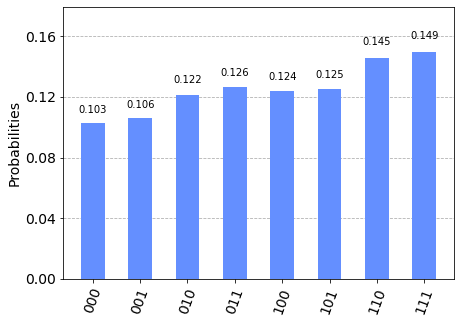

In [ ]:
## Expected value of a 8x8 Density Matrix with Isometries

backend = Aer.get_backend('qasm_simulator')
qc = QuantumCircuit(6, 3)
qc.initialize(a, [0, 1, 2])
qc.initialize(np.sqrt(lambda_train), [3, 4, 5])
qc.isometry(U_train.T, [], [0, 1, 2]) # ArbRot as a isometry
qc.cnot(5, 2)
qc.cnot(4, 1)
qc.cnot(3, 0)
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

counts = execute(qc, backend, shots=150000).result().get_counts()
plot_histogram(counts)

# Works

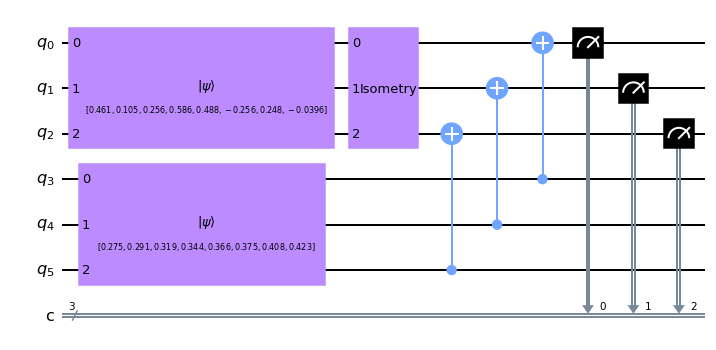

In [ ]:
qc.draw("mpl")

In [ ]:
# Comparison between the results obtained by the circuit and the expected result
exp_a_calculated = (counts["000"]/150000)
exp_a_theorical = a.T @ rho_train @ a

exp_a_calculated, exp_a_theorical

(0.10266, 0.102462229484645)

#### Conclusion

The expected value of the density matrix obtained by the circuit is 0.10266, the expected result was 0.102462

### Example Pure State (8x8)

We show how to compute the projection between two quantum states, which corresponds to the expected value of a pure density matrix. We did not proposed this method, it is based on [QTML2021].

In [ ]:
# Given the eigenvalues this function return a Unitary gate which converts the |0> -> |psi_train>
def create_U_train(x_train_param, seed=0):
  np.random.seed(seed)
  size_U = len(x_train_param)
  U_train = np.zeros((size_U, size_U))
  x_1 = x_train_param
  U_train[:, 0] = x_1
  for i in range(1, size_U):
    x_i = np.random.randn(size_U)
    for j in range(0, i):
      x_i -= x_i.dot(U_train[:, j]) * U_train[:, j]
    x_i = x_i/np.linalg.norm(x_i)
    U_train[:, i] = x_i
  
  return U_train

In [ ]:
# Example to predict a 
np.random.seed(0)
a = np.random.normal(size=(8))
a = a / np.linalg.norm(a)

# Create a density matrix from 100 random examples name it x_train for pure states
x_train = np.random.normal(size=(100, 8))
x_train = x_train.sum(axis = 0)
x_train = x_train / np.linalg.norm(x_train)

U_train = create_U_train(x_train)

(x_train**2).sum(), U_train

(1.0, array([[-0.40956759,  0.31412729, -0.58688388,  0.30053684,  0.33094154,
         -0.3383931 ,  0.25238096,  0.10533287],
        [-0.2890886 , -0.02388176,  0.2264827 ,  0.02391376, -0.64282764,
         -0.60863405, -0.03189844,  0.28162186],
        [-0.45525577,  0.06370831, -0.15776071,  0.01154427, -0.35150837,
          0.1846809 , -0.17341667, -0.75889605],
        [-0.10917489,  0.59840266,  0.55940941,  0.25414967, -0.02590904,
          0.23805757,  0.44086826, -0.0275072 ],
        [-0.36445305,  0.36609086,  0.09623833, -0.75648236,  0.22533225,
          0.02330659, -0.2613604 ,  0.17887705],
        [-0.58494098, -0.56772558,  0.38459265,  0.18107349,  0.37946048,
          0.07902726,  0.01707193,  0.0656169 ],
        [ 0.00453847,  0.27835736,  0.09427881,  0.48769201,  0.08866809,
          0.06599   , -0.79755245,  0.16570447],
        [ 0.23345796,  0.06922096,  0.31683395, -0.03851947,  0.38780665,
         -0.64275429, -0.07847008, -0.51880026]]))

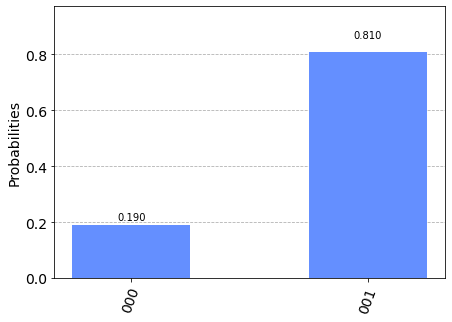

In [ ]:
## Density Estimation Aproach 2 matrices 8x8
## This method is a simpliflied version of the one presented before

backend = Aer.get_backend('qasm_simulator')
qc = QuantumCircuit(3, 3)
qc.initialize(a, [0, 1, 2])
qc.isometry(U_train.T, [], [0, 1, 2]) # ArbRot as a isometry
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

counts = execute(qc, backend, shots=150000).result().get_counts()
plot_histogram(counts)

# Works

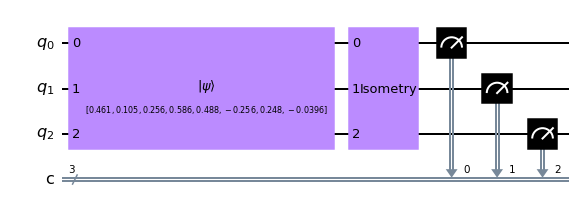

In [ ]:
qc.draw("mpl")

In [ ]:
exp_a_calculated = (counts["000"]/150000)
exp_a_theorical = np.dot(x_train, a)**2

exp_a_calculated, exp_a_theorical

(0.19020666666666666, 0.19039803575411707)

## DMKDE for pdf Estimation

The Density Matrix Kernel Density Estimation (DMKDE) [Gonzalez2021] takes the expected values of density matrices with a quantum feauture map based on Random Fourier Feautures [Rahimi2007] to estimate probability Density Funtions. 

Our contribution is to show that it is possible to implement the prediction phase of the DMKDE in a quantum computer. The method has been implemented in a qudit based quantum computer [Useche2021], in this project we show it is possible in a qubit-based quantum computer.

### (16x16) DMKDE Mixed State

In [ ]:
def calculate_constant_qmkde(gamma=1):
  constant_kernel = (2*np.pi)**(-1/2)
  sigma = (4*gamma)**(-1/2)
  constant_outside = 1/(sigma)
  return constant_kernel * constant_outside

In [ ]:
# ----------------------------------------------------------------------
# Plot a 1D density example
N = 1000
np.random.seed(1)
X = np.concatenate((np.random.normal(-1, 1, int(0.65 * N)),
                    np.random.normal(3, 1, int(0.35 * N))))[:, np.newaxis]

X_plot = np.linspace(-7, 7, 250)[:, np.newaxis]

true_dens = (0.65 * norm(-1, 1).pdf(X_plot[:, 0])
             + 0.35 * norm(3, 1).pdf(X_plot[:, 0]))

In [ ]:
from sklearn.kernel_approximation import RBFSampler
"""
  Code from https://arxiv.org/abs/2004.01227
"""
class QFeatureMap: 

  def get_dim(self, num_features):
    pass

  def batch2wf(self, X):
    pass

  def batch2dm(self, X):
    pass

  def batch2dm(self, X):
    psi = self.batch2wf(X)
    rho = np.einsum('...i,...j', psi, np.conj(psi))
    return rho

class QFeatureMap_rff(QFeatureMap):

  def __init__(self, rbf_sampler):
    self.rbf_sampler = rbf_sampler
    self.weights = np.array(rbf_sampler.random_weights_)
    self.offset = np.array(rbf_sampler.random_offset_)
    self.dim = rbf_sampler.get_params()['n_components']

  def get_dim(self, num_features):
    return self.dim

  def batch2wf(self, X):
    vals = np.dot(X, self.weights) + self.offset
    vals = np.cos(vals)
    vals *= np.sqrt(2.) / np.sqrt(self.dim)
    norms = np.linalg.norm(vals, axis=1)
    psi = vals / norms[:, np.newaxis]
    return psi

In [ ]:
# Create the RandomFourierFeature map
dim = 16
rm_state = 2
feature_map_fourier = RBFSampler(gamma=2, n_components=dim, random_state=rm_state)
X_feat_train = feature_map_fourier.fit(X)
rffmap = QFeatureMap_rff(rbf_sampler=feature_map_fourier)
X_feat_train = rffmap.batch2wf(X)

X_feat_test = rffmap.batch2wf(X_plot)

X_feat_train.shape, X_feat_test.shape

((1000, 16), (250, 16))

In [ ]:
## Training
## Trainig of the DMKDE is done in a classical computer.

rho_train = np.zeros((16, 16))

for i in range(1000):
  rho_train += np.outer(X_feat_train[i], X_feat_train[i])

rho_train = rho_train / 1000

(X_feat_train[0]**2).sum()

0.9999999999999998

#### Expected Result

In this section we show the implementation of the method in a classical computer to compare it with the implementation in a quantum computer.

In [ ]:
## Expected result
## This code presents the DMKDE in a classical computer.

prob_expected_mixed = np.zeros(250)

for i in range(len(prob_expected_mixed)):
  prob_expected_mixed[i] = X_feat_test[i].T @ rho_train @ X_feat_test[i]

prob_expected_mixed = calculate_constant_qmkde(2) * prob_expected_mixed

prob_expected_mixed.shape

(250,)

Text(0, 0.5, 'Probability')

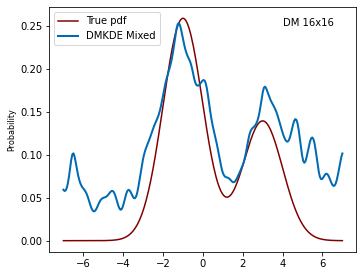

In [ ]:
params = {
   'axes.labelsize': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [5.5, 4.5]
   }
plt.rcParams.update(params)

plt.plot(X_plot[:, 0], true_dens, "maroon", label='True pdf')
colors = ['navy']
kernels = ['gaussian']
lw = 2
plt.plot(X_plot[:, 0], prob_expected_mixed, color='#006BB2', lw=lw,
            linestyle='-', label="DMKDE Mixed")    
plt.text(4, 0.25, f"DM 16x16")
plt.legend(loc='upper left')
plt.xlabel('')
plt.ylabel('Probability')

#### Result in a Quantum Computer

Here we show the prediction phase in a quantum computer, which allowed us to estimate probability density functions. The result of the estimation of the probability density function in a quantum computer is comparable with the classical calculation.

In [ ]:
# Find eigenvectors and eigenvalues
lambda_train, U_train = np.linalg.eigh(rho_train)

lambda_train, U_train

(array([2.21082101e-08, 5.45200938e-06, 5.46881200e-05, 5.29996186e-04,
        4.06247157e-03, 8.49074157e-03, 1.37341069e-02, 1.51956110e-02,
        4.25593877e-02, 4.66138644e-02, 6.87664093e-02, 9.94027023e-02,
        1.11339275e-01, 1.61207624e-01, 1.88196981e-01, 2.39840667e-01]),
 array([[ 9.36642734e-02, -3.48236799e-01, -1.19880008e-01,
          7.10257687e-02, -6.88923366e-02,  4.11767561e-01,
          3.35218929e-01,  5.54806261e-02, -1.31530676e-01,
          4.39846474e-01, -5.49419674e-02,  1.94445682e-01,
         -5.69147862e-02,  1.73710556e-01,  4.07222430e-01,
         -3.31596157e-01],
        [-1.73681555e-02,  6.32646887e-02,  2.84661009e-02,
         -9.69606735e-02,  7.24745838e-02,  1.56721379e-02,
          3.98932917e-04, -4.69592695e-02, -4.89115177e-01,
          1.98417622e-01, -2.95767141e-01,  3.17063101e-01,
         -3.13651380e-01, -4.81873831e-01,  2.92140757e-02,
          4.23954316e-01],
        [-8.42612846e-04,  3.62005454e-03, -5.66369984e-

In [ ]:
# Predict with the quantum circuit
backend = Aer.get_backend('qasm_simulator')
prob_test_mixed = np.zeros(250)

exp_time = time()
for i in range(len(prob_test_mixed)):
  qc = QuantumCircuit(8, 4)
  qc.initialize(X_feat_test[i], [0, 1, 2, 3])
  qc.initialize(np.sqrt(lambda_train, dtype = np.float64), [4, 5, 6, 7])
  qc.isometry(U_train.T, [], [0, 1, 2, 3]) # ArbRot as a isometry
  qc.cnot(7, 3)
  qc.cnot(6, 2)
  qc.cnot(5, 1)
  qc.cnot(4, 0)
  qc.measure(0, 0)
  qc.measure(1, 1)
  qc.measure(2, 2)
  qc.measure(3, 3)
  counts = execute(qc, backend, shots=10000).result().get_counts()
  prob_zero = (counts["0000"]/10000)
  prob_test_mixed[i] = prob_zero
  if i % 10 == 0:
    print(i)
    print(time() - exp_time)
    exp_time = time()

0
10.685803174972534
10
103.40195870399475
20
103.74765133857727
30
103.71568632125854
40
103.55290651321411
50
108.12654328346252
60
103.71877217292786
70
103.65322875976562
80
104.24595355987549
90
103.60946369171143
100
103.48164296150208
110
103.90748643875122
120
103.55590033531189
130
103.48113203048706
140
103.84045147895813
150
103.6746301651001
160
103.85183334350586
170
103.78565764427185
180
103.15175127983093
190
103.7325005531311
200
104.15579414367676
210
103.49840307235718
220
103.18597960472107
230
103.97791171073914
240
103.48532247543335


In [ ]:
prob_test_mixed_2 = calculate_constant_qmkde(2) * prob_test_mixed

Text(0, 0.5, 'Probability')

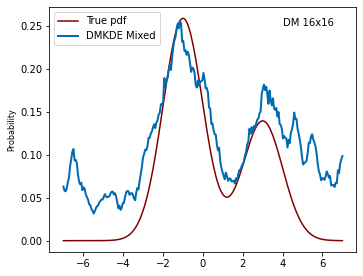

In [ ]:
params = {
   'axes.labelsize': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [5.5, 4.5]
   }
plt.rcParams.update(params)

plt.plot(X_plot[:, 0], true_dens, "maroon", label='True pdf')
colors = ['navy']
kernels = ['gaussian']
lw = 2
plt.plot(X_plot[:, 0], prob_test_mixed_2, color='#006BB2', lw=lw,
            linestyle='-', label="DMKDE Mixed")    
plt.text(4, 0.25, f"DM 16x16")
plt.legend(loc='upper left')
plt.xlabel('')
plt.ylabel('Probability')

### (16x16) DMKDE Pure State

In [ ]:
def calculate_constant_qmkde_pure(gamma=1):
  constant_kernel = (2*np.pi)**(-1/2)
  sigma = (2*gamma)**(-1/2)
  constant_outside = 1/(sigma)
  return constant_kernel * constant_outside

In [ ]:
# Given the eigenvalues this function return a Unitary gate which converts the |0> -> |lambda>
def create_U_train(x_train_param, seed=0):
  np.random.seed(seed)
  size_U = len(x_train_param)
  U_train = np.zeros((size_U, size_U))
  x_1 = x_train_param
  U_train[:, 0] = x_1
  for i in range(1, size_U):
    x_i = np.random.randn(size_U)
    for j in range(0, i):
      x_i -= x_i.dot(U_train[:, j]) * U_train[:, j]
    x_i = x_i/np.linalg.norm(x_i)
    U_train[:, i] = x_i
  
  return U_train

In [ ]:
# ----------------------------------------------------------------------
# Plot a 1D density example
N = 1000
np.random.seed(1)
X = np.concatenate((np.random.normal(-1, 1, int(0.65 * N)),
                    np.random.normal(3, 1, int(0.35 * N))))[:, np.newaxis]

X_plot = np.linspace(-7, 7, 250)[:, np.newaxis]

true_dens = (0.65 * norm(-1, 1).pdf(X_plot[:, 0])
             + 0.35 * norm(3, 1).pdf(X_plot[:, 0]))

In [ ]:
from sklearn.kernel_approximation import RBFSampler
"""
  Code from https://arxiv.org/abs/2004.01227
"""
class QFeatureMap: 

  def get_dim(self, num_features):
    pass

  def batch2wf(self, X):
    pass

  def batch2dm(self, X):
    pass

  def batch2dm(self, X):
    psi = self.batch2wf(X)
    rho = np.einsum('...i,...j', psi, np.conj(psi))
    return rho

class QFeatureMap_rff(QFeatureMap):

  def __init__(self, rbf_sampler):
    self.rbf_sampler = rbf_sampler
    self.weights = np.array(rbf_sampler.random_weights_)
    self.offset = np.array(rbf_sampler.random_offset_)
    self.dim = rbf_sampler.get_params()['n_components']

  def get_dim(self, num_features):
    return self.dim

  def batch2wf(self, X):
    vals = np.dot(X, self.weights) + self.offset
    vals = np.cos(vals)
    vals *= np.sqrt(2.) / np.sqrt(self.dim)
    norms = np.linalg.norm(vals, axis=1)
    psi = vals / norms[:, np.newaxis]
    return psi

In [ ]:
# Create the RandomFourierFeature map
dim = 16
rm_state = 2 # originally 1
feature_map_fourier = RBFSampler(gamma=2, n_components=dim, random_state=rm_state)
X_feat_train = feature_map_fourier.fit(X)
rffmap = QFeatureMap_rff(rbf_sampler=feature_map_fourier)
X_feat_train = rffmap.batch2wf(X)

X_feat_test = rffmap.batch2wf(X_plot)

X_feat_train.shape, X_feat_test.shape

((1000, 16), (250, 16))

In [ ]:
## Training pure state and create the Unitary matrix to initialize such state

psi_train = X_feat_train.sum(axis = 0)
psi_train = psi_train / np.linalg.norm(psi_train)

U_train = create_U_train(psi_train)

(psi_train**2).sum()

1.0

In [ ]:
## Expected result 
psi_train_total = (X_feat_train.sum(axis = 0) / np.linalg.norm(X_feat_train.sum(axis = 0))).reshape(-1, 1)
prob_test_16_expected = X_feat_test @ psi_train_total
prob_test_16_expected = calculate_constant_qmkde_pure(2) * np.sqrt(prob_test_16_expected**2) * np.linalg.norm(X_feat_train.sum(axis = 0)) / 1000
psi_train_total.shape, X_feat_test.shape, prob_test_16_expected.shape

((16, 1), (250, 16), (250, 1))

Text(0, 0.5, 'Probability')

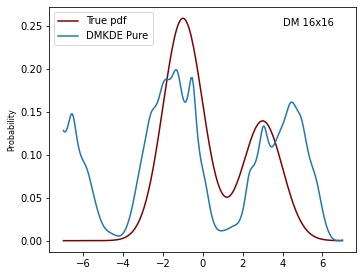

In [ ]:
# Expected result in a classical computer
params = {
   'axes.labelsize': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [5.5, 4.5]
   }
plt.rcParams.update(params)

plt.plot(X_plot[:, 0], true_dens, "maroon", label='True pdf')
colors = ['navy']
kernels = ['gaussian']
lw = 2
#plt.plot(X_plot[:, 0], prob_test_16_expected.ravel(), color='green', lw=lw,
            # linestyle='-', label="DMKDE Pure")  
plt.plot(X_plot[:, 0], prob_test_16_expected.ravel(), label="DMKDE Pure") 
plt.text(4, 0.25, f"DM 16x16")
plt.legend(loc='upper left')
plt.xlabel('')
plt.ylabel('Probability')

In [ ]:
# Predict with the pure state quantum circuit
prob_test = np.zeros(250)
backend = Aer.get_backend('qasm_simulator')
exp_time = time()

for i in range(len(prob_test)):
  #"""
  qc = QuantumCircuit(4, 4)
  qc.initialize(X_feat_test[i], [0, 1, 2, 3])
  qc.isometry(U_train.T, [], [0, 1, 2, 3]) # ArbRot as a isometry
  qc.measure(0, 0)
  qc.measure(1, 1)
  qc.measure(2, 2)
  qc.measure(3, 3)
  counts = execute(qc, backend, shots=10000).result().get_counts()
  try:
    prob_zero = (counts["0000"]/10000)
  except:
    prob_zero = 0
  prob_test[i] = prob_zero
  if i % 10 == 0:
    print(i)
    print(time() - exp_time)
    exp_time = time()

0
2.7068257331848145
10
24.05736780166626
20
23.878232717514038
30
24.635027647018433
40
23.471964359283447
50
23.447585344314575
60
24.054346084594727
70
23.90100908279419
80
24.12700867652893
90
24.507858991622925
100
24.163734912872314
110
23.561205625534058
120
23.547842741012573
130
23.78159809112549
140
23.780375957489014
150
24.738229274749756
160
24.042202711105347
170
24.1181857585907
180
24.31393265724182
190
23.36166214942932
200
23.55500054359436
210
23.418930053710938
220
23.71921706199646
230
23.528968572616577
240
23.778280019760132


In [ ]:
prob_test_pure = calculate_constant_qmkde_pure(2) * np.sqrt(prob_test) * (1/1000) * np.linalg.norm(X_feat_train.sum(axis = 0))

Text(0, 0.5, 'Probability')

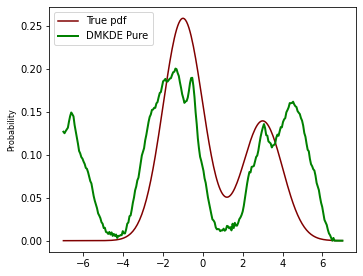

In [ ]:
params = {
   'axes.labelsize': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [5.5, 4.5]
   }
plt.rcParams.update(params)

plt.plot(X_plot[:, 0], true_dens, "maroon", label='True pdf')
colors = ['navy']
kernels = ['gaussian']
lw = 2
plt.plot(X_plot[:, 0], prob_test_pure, color='green', lw=lw,
            linestyle='-', label="DMKDE Pure")    
#plt.text(4, 0.25, f"DM 16x16")
plt.legend(loc='upper left')
plt.xlabel('')
plt.ylabel('Probability')

### Summary of Mixed and Pure

Text(0, 0.5, 'Probability')

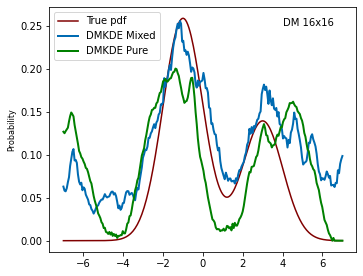

In [ ]:
params = {
   'axes.labelsize': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [5.5, 4.5]
   }
plt.rcParams.update(params)

plt.plot(X_plot[:, 0], true_dens, "maroon", label='True pdf')
colors = ['navy']
kernels = ['gaussian']
lw = 2
plt.plot(X_plot[:, 0], prob_test_mixed_2, color='#006BB2', lw=lw,
            linestyle='-', label="DMKDE Mixed") 
plt.plot(X_plot[:, 0], prob_test_pure, color='green', lw=lw,
            linestyle='-', label="DMKDE Pure")    
plt.text(4, 0.25, f"DM 16x16")
plt.legend(loc='upper left')
plt.xlabel('')
plt.ylabel('Probability')

The Mixed state creates a better estimation of the probability density function, compared with the pure state.



## Acknowledgements

The team thanks specially to our mentor Fabio González for his valuable help and support. Also, we acknowledge the use of IBM Quantum services.

## References

[González2021] Fabio  A.  González,  Alejandro  Gallego,  Santiago  Toledo-Cortés,  and Vladimir Vargas-Calderón.  Learning with Density Matrices and Random Features.  2021.  URL http://arxiv.org/abs/2102.04394.

[QTML2021] Fabio A. González,  Vladimir Vargas-Calderón, Alejandro Gallego, Herbert Vinck-Posada. NON-PARAMETRIC MULTIVARIATE CONTINUOUS DENSITY ESTIMATION IN A QUANTUM COMPUTER. 2021.

[Useche2021] Diego H Useche, Andres Giraldo-Carvajal, Hernan M Zuluaga-Bucheli, Jose A Jaramillo-Villegas, and Fabio A González. Quantum measurement classification with qudits. arXiv preprint arXiv:2107.09781, 2021.

[Parzen1962] Parzen, E. On estimation of a probability density function and mode. The annals of mathematical statistics, 33(3): 1065–1076, 1962	

[Rahimi2007] Rahimi, A. and Recht, B. Random features for large-scale kernel machines. In Proceedings of the 20th International Conference on Neural Information Processing Systems, NIPS’07, pp. 1177–1184, Red Hook, NY, USA, 2007. Curran Associates Inc. ISBN 9781605603520.